In [1]:
!pip install pandas scikit-learn streamlit joblib

In [3]:
import os
os.getcwd()

'C:\\Users\\fizai'

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Show first 5 rows
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
# Separate features (X) and label (y)
X = data.drop('label', axis=1)  # Features: N, P, K, pH, etc.
y = data['label']               # Target: Crop name

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 99.32%


In [11]:
import joblib

# Save the model to a file
joblib.dump(model, "crop_recommendation_model.pkl")
print("Model saved as crop_recommendation_model.pkl")


Model saved as crop_recommendation_model.pkl


In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

Model Accuracy: 99.32%


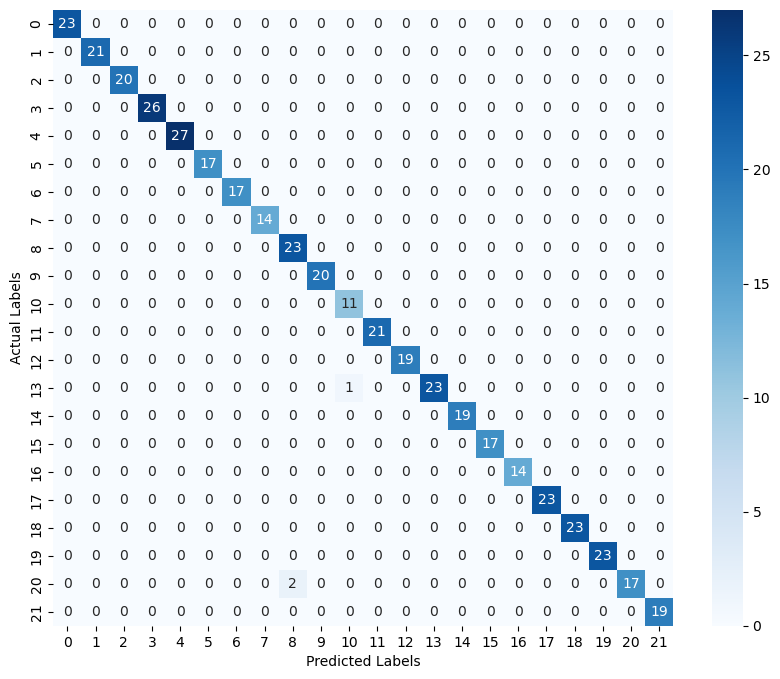

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Separate features (X) and label (y)
X = data.drop('label', axis=1) 
y = data['label'] 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model to a file
joblib.dump(model, "crop_recommendation_model.pkl")
print("Model saved as crop_recommendation_model.pkl")